#  Assignment 6


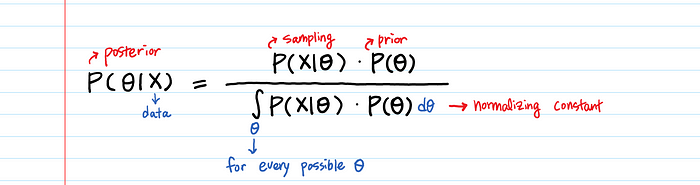

In [ ]:
import jax.numpy as jnp
import matplotlib.pyplot as plt

try:
    import probml_utils as pml
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    import probml_utils as pml
from jax.scipy.stats import beta, bernoulli

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.0/318.0 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.7/94.7 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━

## Conjugate Prior
For certain likelihood functions, selecting a specific prior results in the posterior sharing the same distribution as the prior. This type of prior is then called a **conjugate prior**

When you know that your prior is a conjugate prior, you can skip the

### posterior = likelihood * prior

computation. Moreover, if your prior distribution has a closed-form form expression, you can determine the maximum posterior directly.


### Beta posterior
* Beta prior * Bernoulli likelihood → Beta posterior
* Beta prior * Binomial likelihood → Beta posterior
* Beta prior * Negative Binomial likelihood → Beta posterior
* Beta prior * Geometric likelihood → Beta posterior

### Gamma posterior
* Gamma prior * Poisson likelihood → Gamma posterior
* Gamma prior * Exponential likelihood → Gamma posterior

### Normal posterior
* Normal prior * Normal likelihood (mean) → Normal posterior

In [ ]:
# Points where we evaluate the pdf
x = jnp.linspace(0.001, 0.999, 100)

In [ ]:
# Forms graph given the parameters of the prior, likelihood and posterior:
def make_graph(data, save_name):
    prior = beta.pdf(x, a=data["prior"]["a"], b=data["prior"]["b"])
    n_0 = data["likelihood"]["n_0"]
    n_1 = data["likelihood"]["n_1"]
    samples = jnp.concatenate([jnp.zeros(n_0), jnp.ones(n_1)])
    likelihood_function = jnp.vectorize(lambda p: jnp.exp(bernoulli.logpmf(samples, p).sum()))
    likelihood = likelihood_function(x)
    posterior = beta.pdf(x, a=data["posterior"]["a"], b=data["posterior"]["b"])

    fig, ax = plt.subplots()
    axt = ax.twinx()
    fig1 = ax.plot(
        x,
        prior,
        "k",
        label=f"prior Beta({data['prior']['a']}, {data['prior']['b']})",
        linewidth=2.0,
    )
    fig2 = axt.plot(x, likelihood, "r:", label=f"likelihood Bernoulli", linewidth=2.0)
    fig3 = ax.plot(
        x,
        posterior,
        "b-.",
        label=f"posterior Beta({data['posterior']['a']}, {data['posterior']['b']})",
        linewidth=2.0,
    )
    fig_list = fig1 + fig2 + fig3
    labels = [fig.get_label() for fig in fig_list]
    ax.legend(fig_list, labels, loc="upper left", shadow=True)
    axt.set_ylabel("Likelihood")
    ax.set_ylabel("Prior/Posterior")
    ax.set_title(f"$N_0$:{n_0}, $N_1$:{n_1}")
    pml.savefig(save_name)

## Data 1 (Uninformative Prior, Small Sample):

Prior: This represents a Beta distribution with parameters a=1 and b=1. This is often referred to as a "uniform" prior as it assigns equal probability to all possible values between 0 and 1.


Likelihood: This represents observing 1 success (n_1 = 1) and 4 failures (n_0 = 4) in Bernoulli trials. This suggests a slightly higher probability of failure but doesn't provide strong evidence.

Posterior: This represents the updated belief after considering both the prior and the data. The posterior is also a Beta distribution with parameters a=5 and b=2. This indicates a posterior belief that leans slightly towards failure compared to the prior, but the uncertainty remains high due to the small sample size.

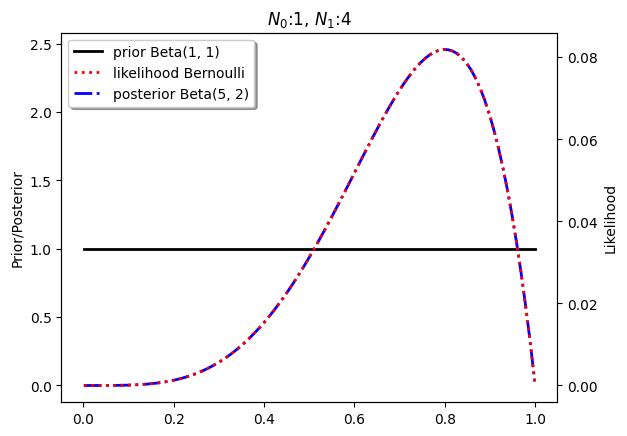

In [ ]:
data1 = {
    "prior": {"a": 1, "b": 1},
    "likelihood": {"n_0": 1, "n_1": 4},
    "posterior": {"a": 5, "b": 2},
}
make_graph(data1, "betaPostUninfSmallSample.pdf")

## Data 2 (Uninformative Prior, Large Sample):

Prior: Same as Data 1 - a uniform Beta distribution.
Likelihood: This represents observing 10 successes (n_1 = 10) and 40 failures (n_0 = 40) in Bernoulli trials. This provides more evidence for a higher probability of failure compared to Data 1.


Posterior: This represents the updated belief. The posterior is again a Beta distribution, but with parameters a=41 and b=11. Compared to Data 1, the posterior is more "shifted" towards lower values, reflecting a stronger belief in failures due to the larger sample size that provides more evidence.

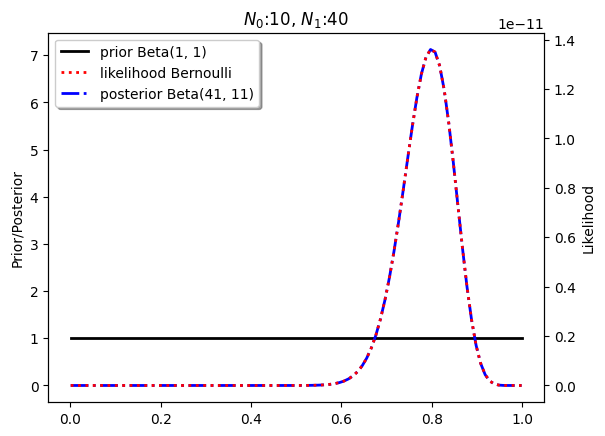

In [ ]:
data2 = {
    "prior": {"a": 1, "b": 1},
    "likelihood": {"n_0": 10, "n_1": 40},
    "posterior": {"a": 41, "b": 11},
}
make_graph(data2, "betaPostUninfLargeSample.pdf")

## Data 3 (Informative Prior, Small Sample):

Prior: This represents a Beta distribution with parameters a=2 and b=2. This prior already suggests a slight preference for values closer to 0.5.

Likelihood: Same as Data 1 - observing 1 success and 4 failures.

Posterior: This represents the updated belief. The posterior is a Beta distribution with parameters a=6 and b=3. While the small sample size doesn't provide overwhelming evidence, the posterior is still slightly shifted towards lower values compared to the prior, reflecting the combined influence of both.

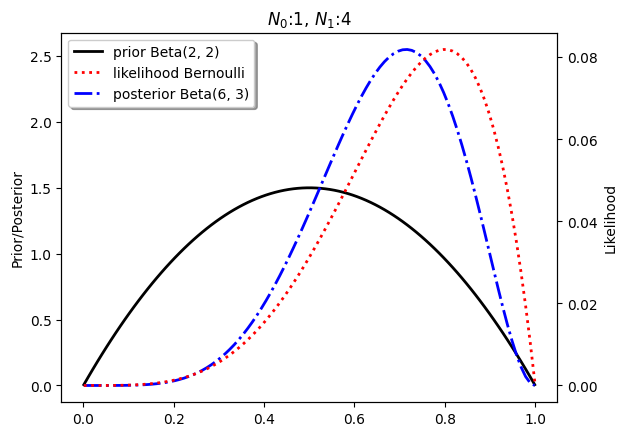

In [ ]:
data3 = {
    "prior": {"a": 2, "b": 2},
    "likelihood": {"n_0": 1, "n_1": 4},
    "posterior": {"a": 6, "b": 3},
}
make_graph(data3, "betaPostInfSmallSample.pdf")

## Data 4 (Informative Prior, Large Sample):

Prior: Same as Data 3 - a Beta distribution with parameters a=2 and b=2.
Likelihood: Same as Data 2 - observing 10 successes and 40 failures.

Posterior: This represents the updated belief. The posterior is a Beta distribution with parameters a=42 and b=12. Similar to Data 2, the larger sample size providing evidence for failure dominates the prior, resulting in a posterior more skewed towards lower values.

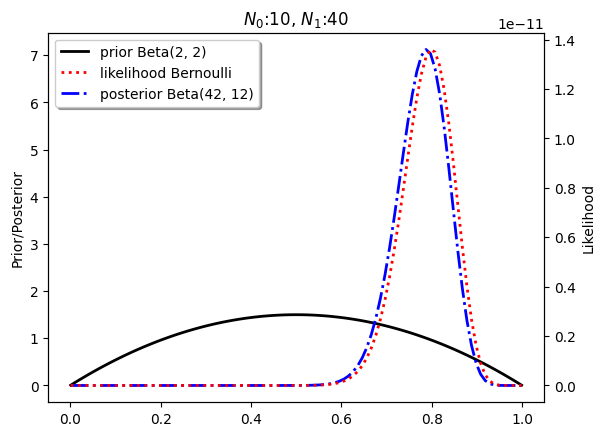

In [ ]:
data4 = {
    "prior": {"a": 2, "b": 2},
    "likelihood": {"n_0": 10, "n_1": 40},
    "posterior": {"a": 42, "b": 12},
}
make_graph(data4, "betaPostInfLargeSample.pdf")

## New Experiment

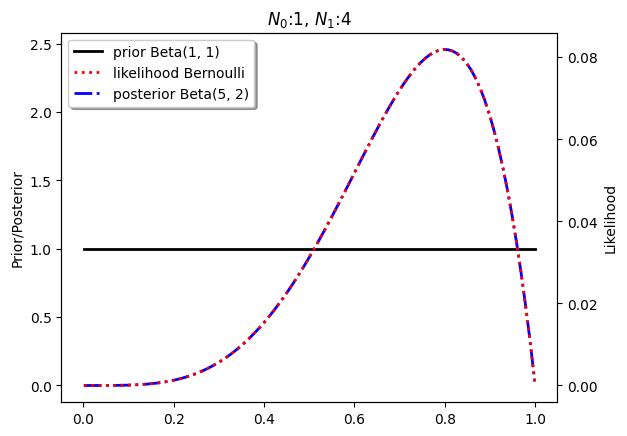

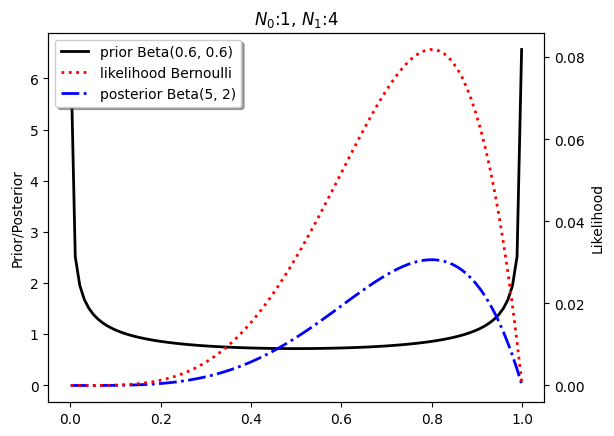

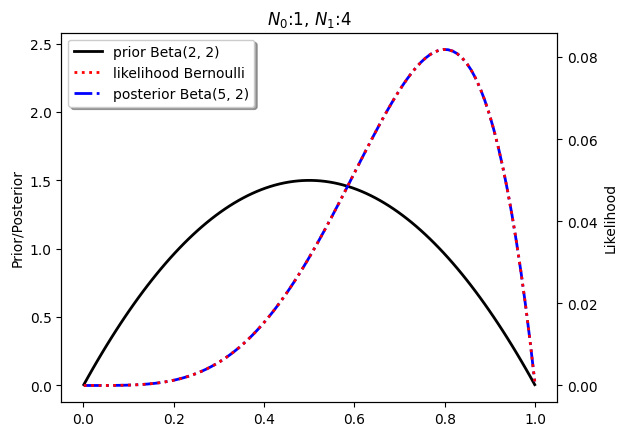

In [ ]:
data1 = {
      "prior": {"a": 1, "b": 1},
      "likelihood": {"n_0": 1, "n_1": 4},
      "posterior": {"a": 5, "b": 2},
}
make_graph(data1, "betaPostUninfSmallSample.pdf")

data1 = {
      "prior": {"a":0.6, "b": 0.6},
      "likelihood": {"n_0": 1, "n_1": 4},
      "posterior": {"a": 5, "b": 2},
}
make_graph(data1, "betaPostUninfSmallSample.pdf")

data1 = {
      "prior": {"a": 2, "b": 2},
      "likelihood": {"n_0": 1, "n_1": 4},
      "posterior": {"a": 5, "b": 2},
}
make_graph(data1, "betaPostUninfSmallSample.pdf")

/usr/local/lib/python3.10/dist-packages/probml_utils/plotting.py:84: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


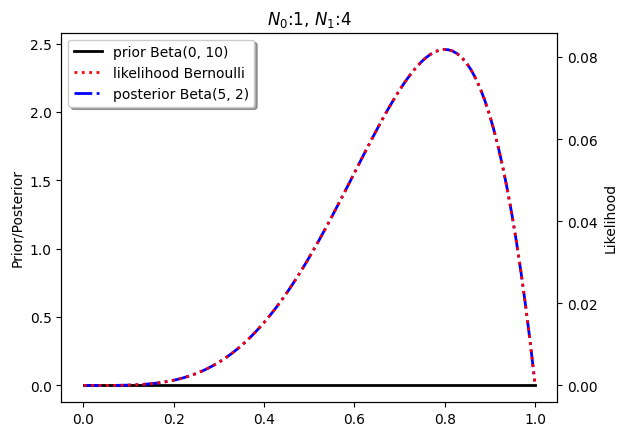

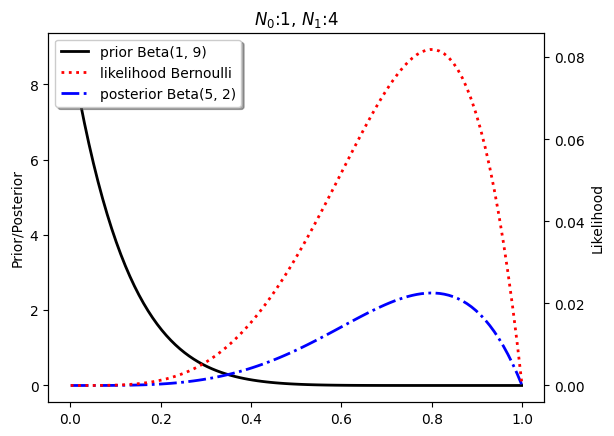

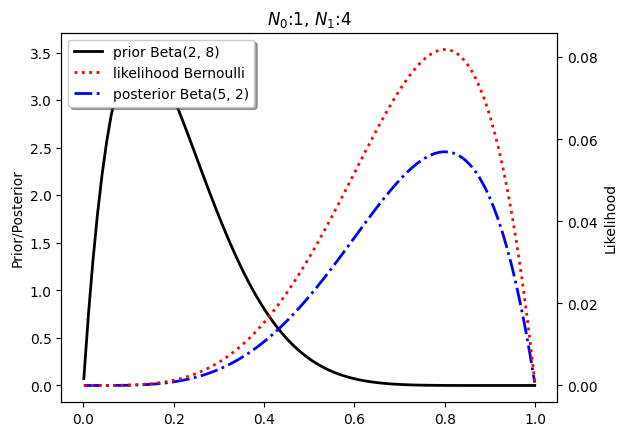

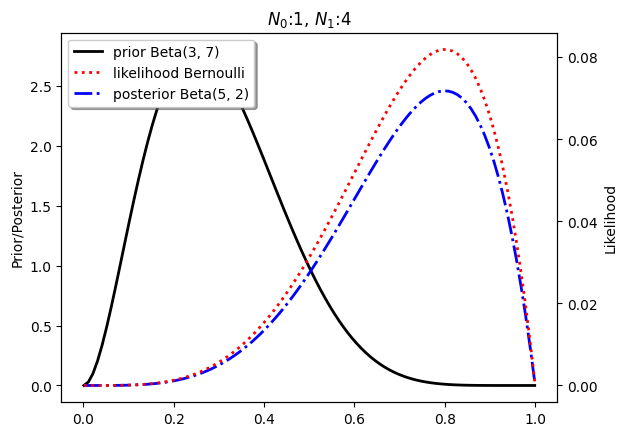

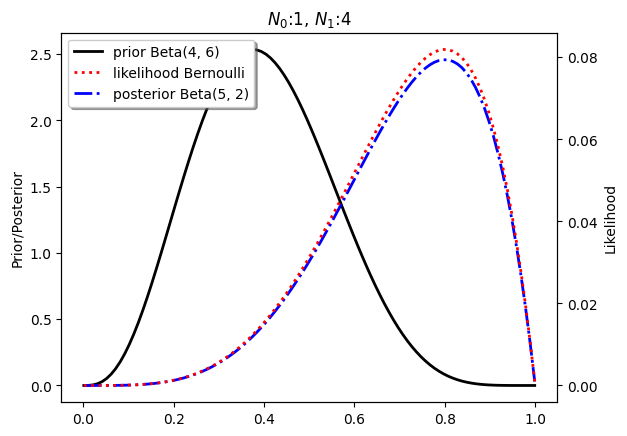

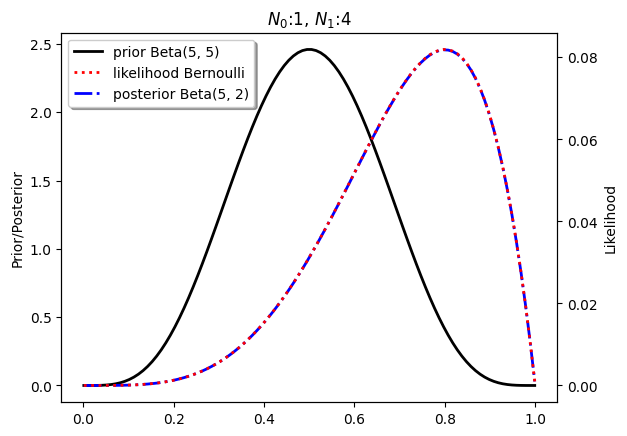

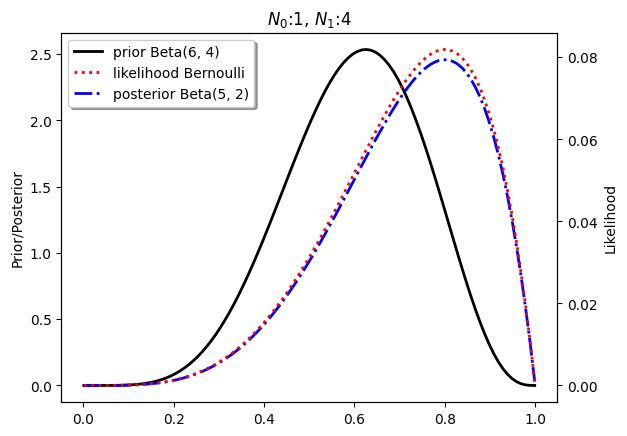

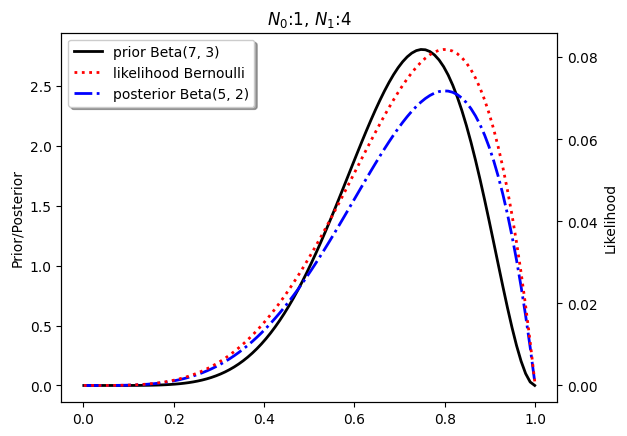

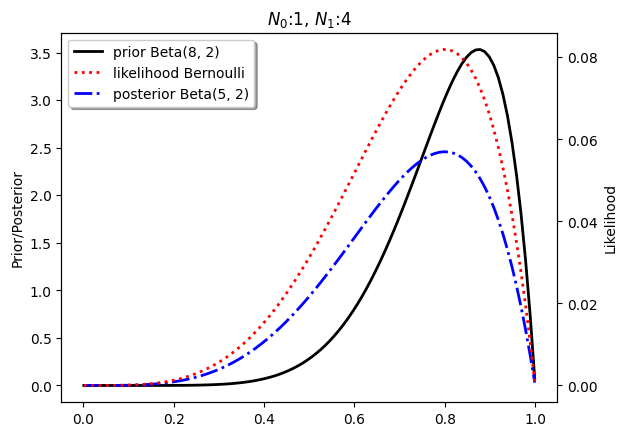

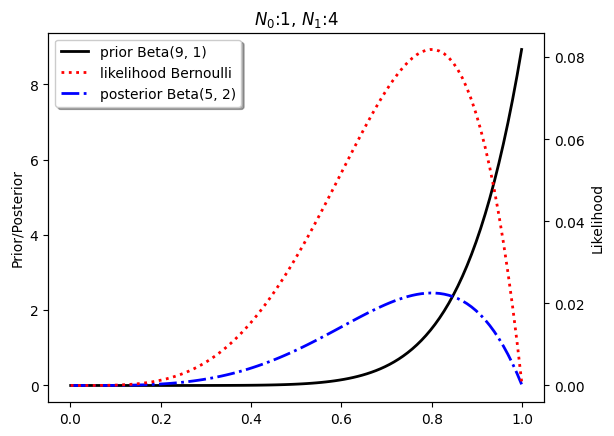

In [ ]:
# checking the variation in prior for different values of a & b
for i in range(10):
  data1 = {
      "prior": {"a": i, "b": 10-i},
      "likelihood": {"n_0": 1, "n_1": 4},
      "posterior": {"a": 5, "b": 2},
  }
  make_graph(data1, "betaPostUninfSmallSample.pdf")

/usr/local/lib/python3.10/dist-packages/probml_utils/plotting.py:84: UserWarning: set FIG_DIR environment variable to save figures
  warnings.warn("set FIG_DIR environment variable to save figures")


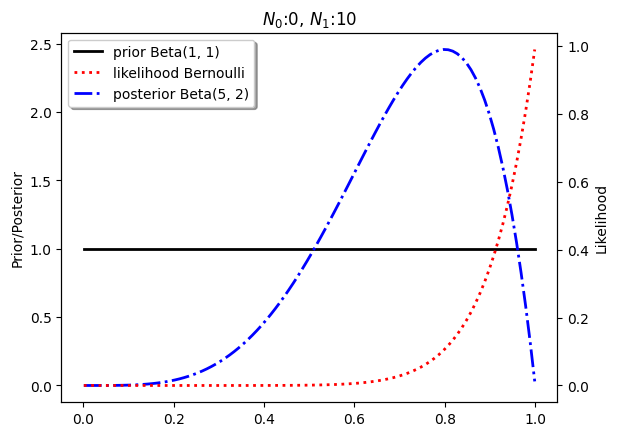

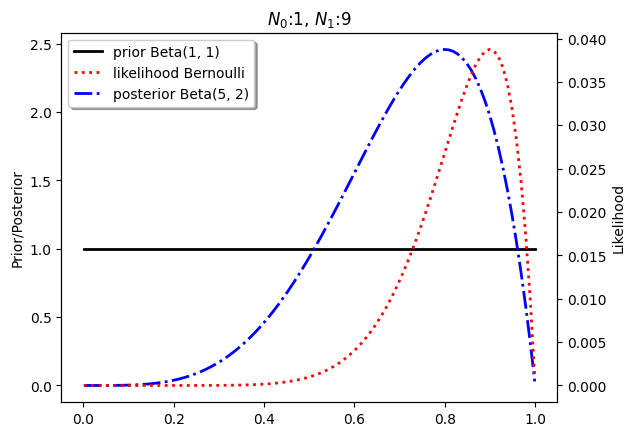

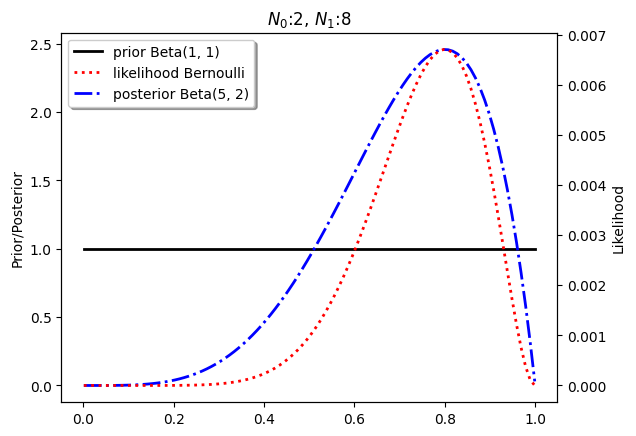

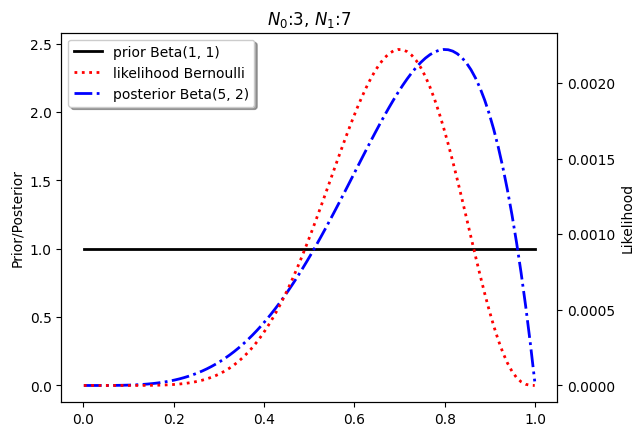

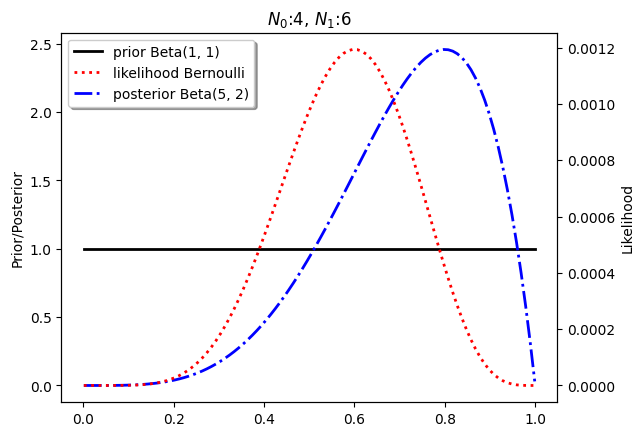

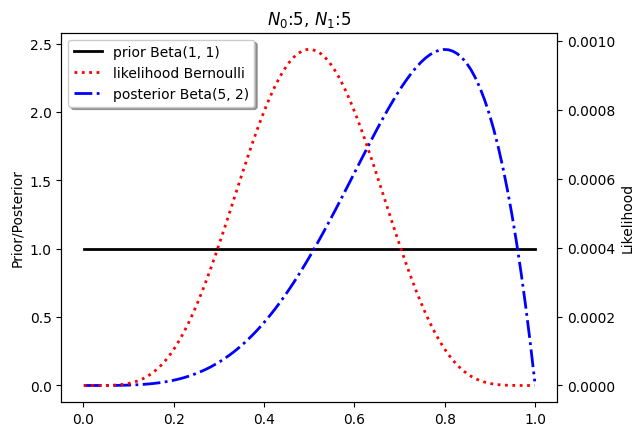

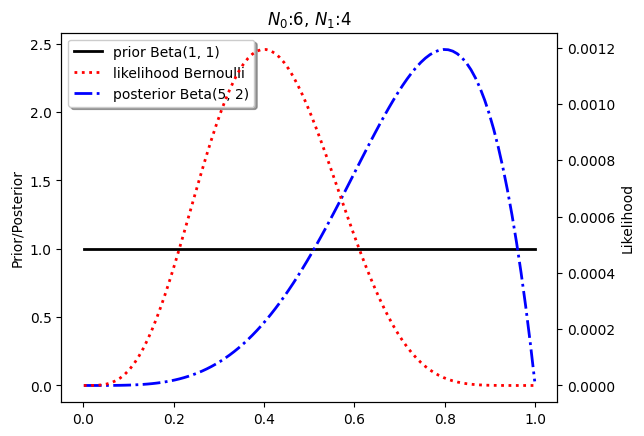

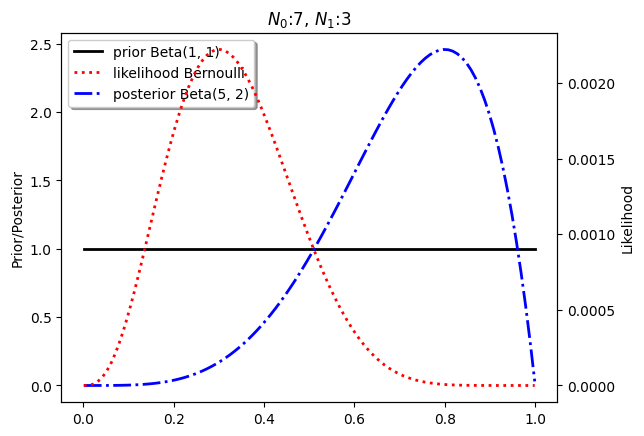

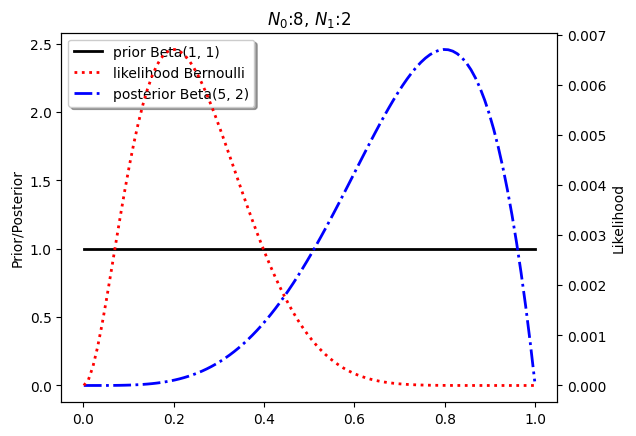

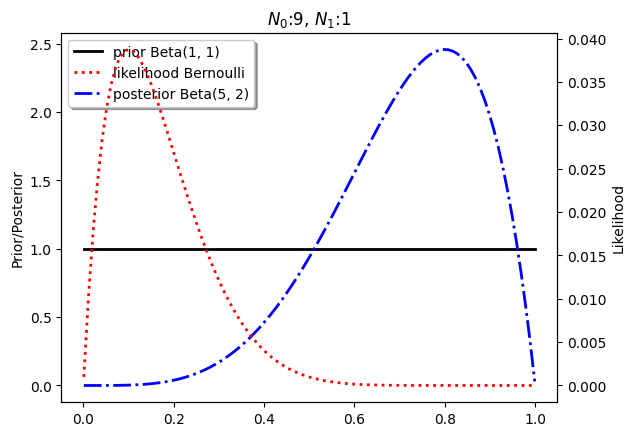

In [ ]:
# checking the variation for the different values of likelihood
for i in range(10):
  data1 = {
    "prior": {"a": 1, "b": 1},
    "likelihood": {"n_0": i, "n_1": 10-i},
    "posterior": {"a": 5, "b": 2},
  }
  make_graph(data1, "betaPostUninfSmallSample.pdf")

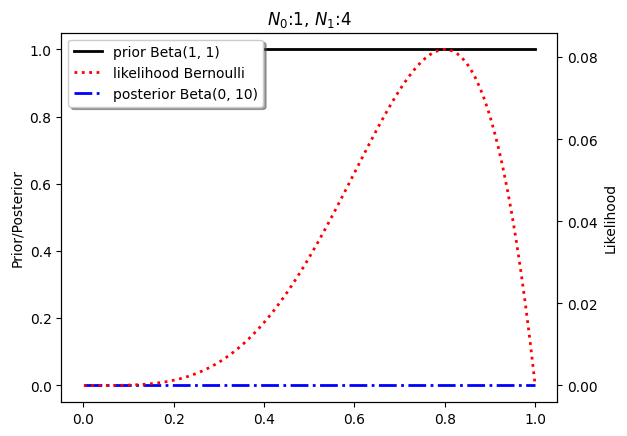

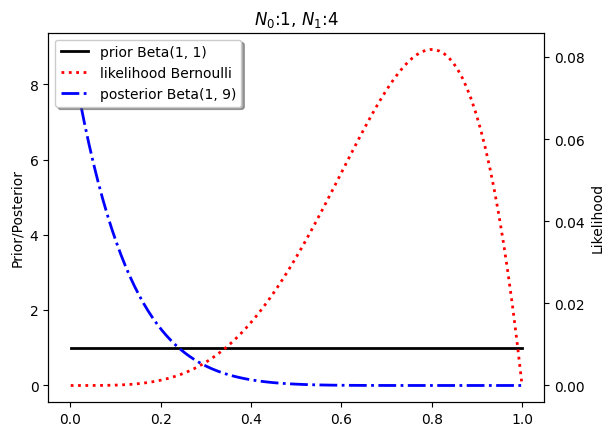

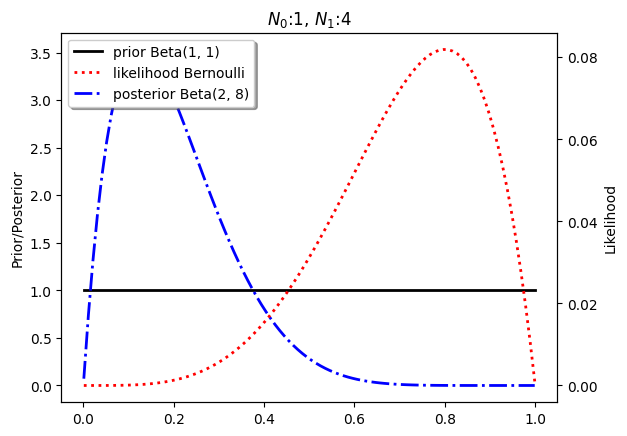

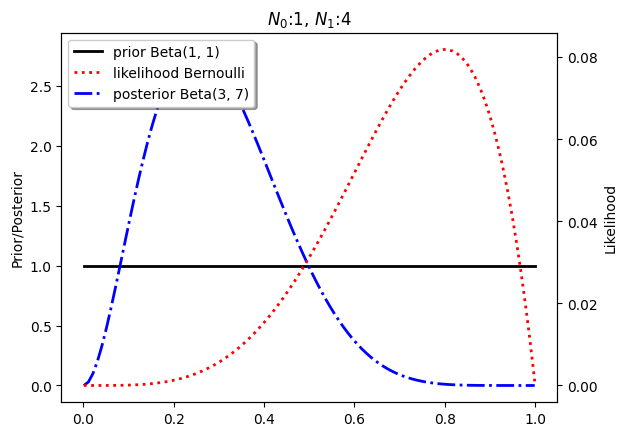

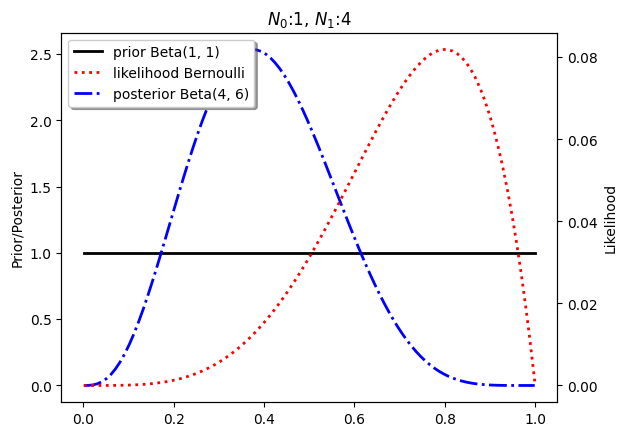

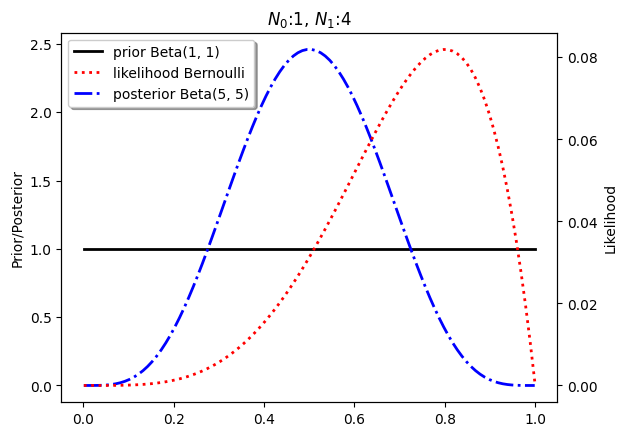

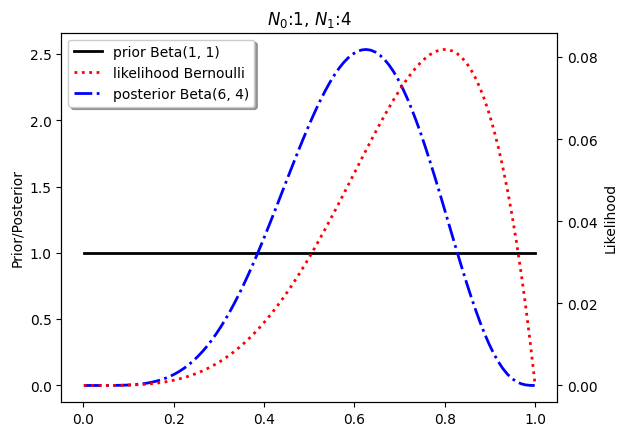

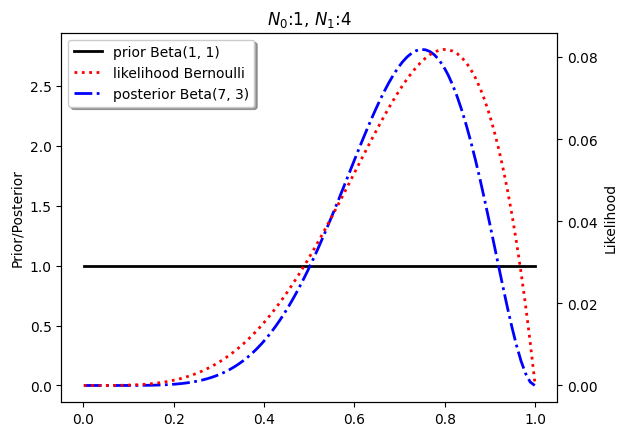

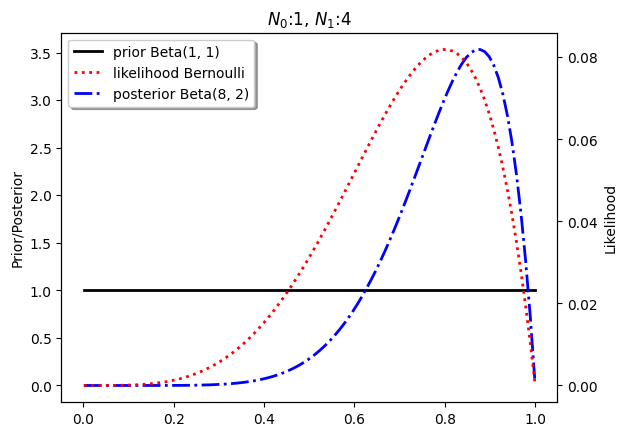

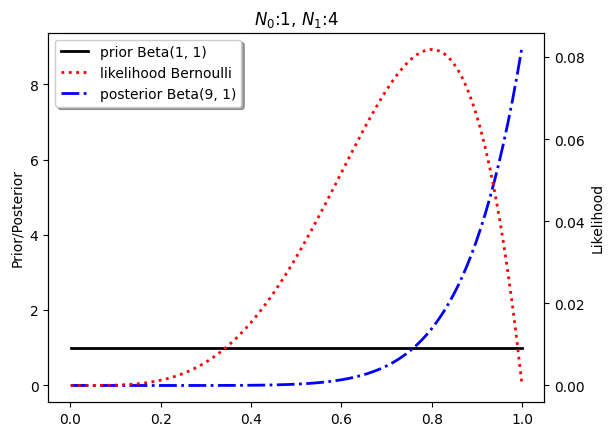

In [ ]:
# checking the variation for the different values of posterior
for i in range(10):
  data1 = {
    "prior": {"a": 1, "b": 1},
    "likelihood": {"n_0": 1, "n_1": 4},
    "posterior": {"a": i, "b": 10-i},
  }
  make_graph(data1, "betaPostUninfSmallSample.pdf")

In [ ]:
# # checking the variation in prior for different values of a & b
# for i in range(5,25,5):
#   data1 = {
#       "prior": {"a": 1, "b": 1},
#       "likelihood": {"n_0": i*1, "n_1": i*4},
#       "posterior": {"a": 5, "b": 2},
#   }
#   make_graph(data1, "betaPostUninfSmallSample.pdf")

### -------------------------------------------------------------

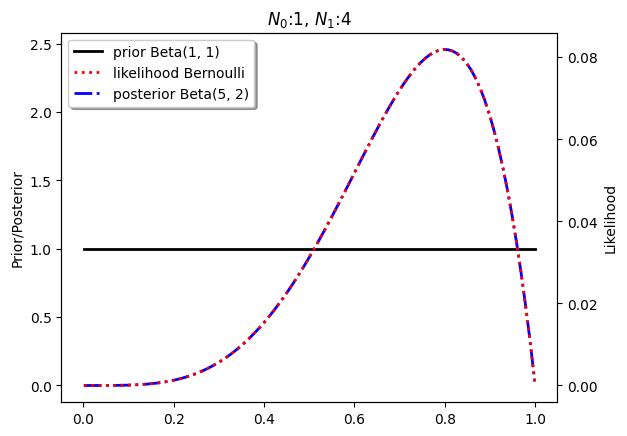

In [ ]:
data1 = {
      "prior": {"a": 1, "b": 1},
      "likelihood": {"n_0": 1, "n_1": 4},
      "posterior": {"a": 5, "b": 2},
}
make_graph(data1, "betaPostUninfSmallSample.pdf")

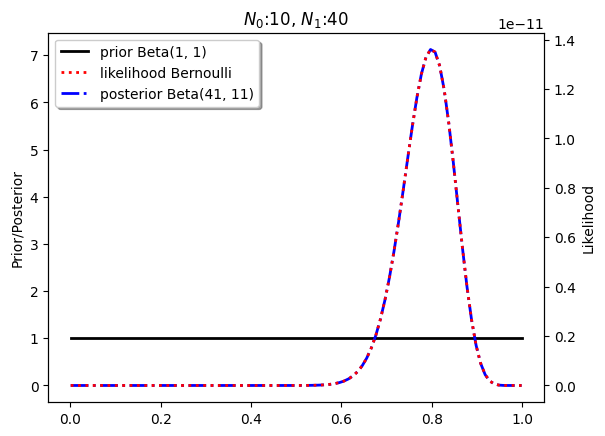

In [ ]:
data2 = {
    "prior": {"a": 1, "b": 1},
    "likelihood": {"n_0": 10, "n_1": 40},
    "posterior": {"a": 41, "b": 11},
}
make_graph(data2, "betaPostUninfLargeSample.pdf")

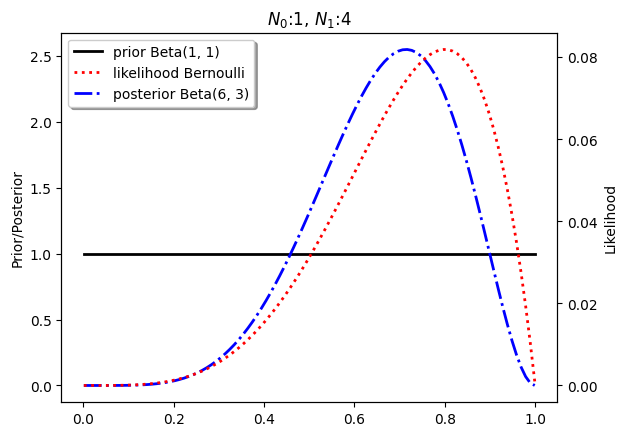

In [ ]:
data3 = {
    "prior": {"a": 1, "b": 1},
    "likelihood": {"n_0": 1, "n_1": 4},
    "posterior": {"a": 6, "b": 3},
}
make_graph(data3, "betaPostInfSmallSample.pdf")

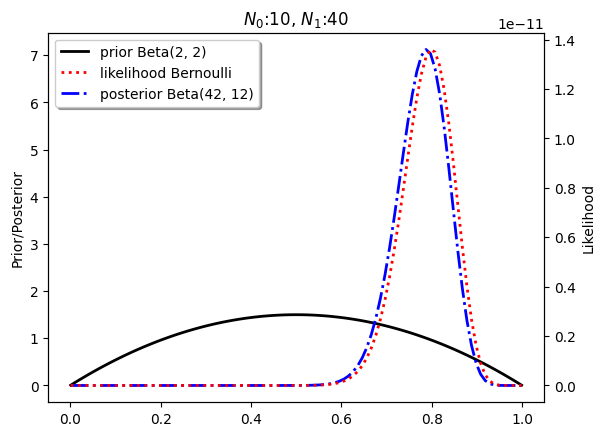

In [ ]:
data4 = {
    "prior": {"a": 2, "b": 2},
    "likelihood": {"n_0": 10, "n_1": 40},
    "posterior": {"a": 42, "b": 12},
}
make_graph(data4, "betaPostInfLargeSample.pdf")


plt.show()